# (Keras) IMDB Dataset

In [1]:
import numpy as np
from tensorflow.contrib.keras.python.keras.optimizers import SGD, RMSprop, Adagrad
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers.core import Dense, Dropout
from tensorflow.contrib.keras.python.keras.layers.embeddings import Embedding
from tensorflow.contrib.keras.python.keras.layers.recurrent import LSTM, GRU, SimpleRNN
from tensorflow.contrib.keras.python.keras.regularizers import l2
from tensorflow.contrib.keras.python.keras.optimizers import Adam
from tensorflow.contrib.keras.python.keras.preprocessing import sequence
from tensorflow.contrib.keras.python.keras.datasets import imdb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from yaringal_callbacks import ModelTest
from yaringal_dataset import loader

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8, 5)

# Global params:
NB_WORDS = 20000
SKIP_TOP = 0
TEST_SPLIT = 0.2
INIT_SEED = 2017
GLOBAL_SEED = 2018
MAXLEN = 80
BATCH_SIZE = 128
TEST_BATCH_SIZE = 512
WEIGHT_DECAY = 1e-4

In [2]:
np.random.seed(100)

In [3]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=NB_WORDS)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=MAXLEN)
X_test = sequence.pad_sequences(X_test, maxlen=MAXLEN)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [4]:
def get_model(idrop=0.2, edrop=0.1, odrop=0.25, rdrop=0.2, weight_decay=WEIGHT_DECAY):
    model = Sequential()
    model.add(Embedding(NB_WORDS, 128, embeddings_regularizer=l2(weight_decay),
                        input_length=MAXLEN))  # , batch_input_shape=(batch_size, maxlen)))
    if edrop:
        model.add(Dropout(edrop))
    model.add(LSTM(128, kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                   bias_regularizer=l2(weight_decay), dropout=idrop, recurrent_dropout=rdrop))
    if odrop:
        model.add(Dropout(odrop))
    model.add(Dense(1, kernel_regularizer=l2(weight_decay),
                    bias_regularizer=l2(weight_decay), activation='sigmoid'))
    optimizer = Adam(1e-3)
    model.compile(loss='binary_crossentropy', metrics=["binary_accuracy"], optimizer=optimizer)
    return model

## Normal Variational LSTM (w/o Embedding Dropout)
All models in this notebook do not have embedding dropout as Keras does not have such layer.

In [5]:
print('Build model...')
model = get_model(idrop=0.25, edrop=0, odrop=0.25, rdrop=0.25, weight_decay=1e-4)

Build model...


In [6]:
modeltest_1 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=1, verbose=0,
                        loss='binary', batch_size=TEST_BATCH_SIZE)

In [7]:
history_1 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=20, callbacks=[modeltest_1])

Epoch 1/25
Standard logloss/acc at epoch 00000: 0.6829/54.32%
MC logloss/acc at epoch 00000: 0.6835/54.42%
21s - loss: 65.0422 - binary_accuracy: 0.5311
Epoch 2/25
Standard logloss/acc at epoch 00001: 0.6339/63.39%
MC logloss/acc at epoch 00001: 0.6381/62.98%
21s - loss: 35.2391 - binary_accuracy: 0.5753
Epoch 3/25
Standard logloss/acc at epoch 00002: 0.5622/70.75%
MC logloss/acc at epoch 00002: 0.5711/70.23%
20s - loss: 18.5017 - binary_accuracy: 0.6437
Epoch 4/25
Standard logloss/acc at epoch 00003: 0.4053/81.53%
MC logloss/acc at epoch 00003: 0.4163/81.06%
20s - loss: 9.3558 - binary_accuracy: 0.7352
Epoch 5/25
Standard logloss/acc at epoch 00004: 0.3588/83.98%
MC logloss/acc at epoch 00004: 0.3667/83.88%
20s - loss: 4.5830 - binary_accuracy: 0.8244
Epoch 6/25
Standard logloss/acc at epoch 00005: 0.3435/84.62%
MC logloss/acc at epoch 00005: 0.3471/84.63%
20s - loss: 2.2710 - binary_accuracy: 0.8616
Epoch 7/25
Standard logloss/acc at epoch 00006: 0.3616/84.23%
MC logloss/acc at epoch

/home/ceshine/miniconda3/envs/ds36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/home/ceshine/miniconda3/envs/ds36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


Standard logloss/acc at epoch 00017: nan/81.14%
MC logloss/acc at epoch 00017: 0.5987/81.11%
21s - loss: 0.2368 - binary_accuracy: 0.9756
Epoch 19/25
Standard logloss/acc at epoch 00018: nan/81.87%
MC logloss/acc at epoch 00018: 0.6136/81.82%
21s - loss: 0.2265 - binary_accuracy: 0.9784
Epoch 20/25
Standard logloss/acc at epoch 00019: nan/81.50%
MC logloss/acc at epoch 00019: nan/81.59%
21s - loss: 0.2221 - binary_accuracy: 0.9776
Epoch 21/25
Standard logloss/acc at epoch 00020: nan/81.85%
MC logloss/acc at epoch 00020: nan/81.73%
21s - loss: 0.2162 - binary_accuracy: 0.9791
Epoch 22/25
Standard logloss/acc at epoch 00021: nan/81.78%
MC logloss/acc at epoch 00021: nan/81.72%
21s - loss: 0.2117 - binary_accuracy: 0.9798
Epoch 23/25
Standard logloss/acc at epoch 00022: nan/81.56%
MC logloss/acc at epoch 00022: nan/81.57%
21s - loss: 0.2059 - binary_accuracy: 0.9815
Epoch 24/25
Standard logloss/acc at epoch 00023: nan/81.23%
MC logloss/acc at epoch 00023: 0.6283/81.26%
21s - loss: 0.2030 

In [11]:
best_epoch = np.argmin([x[1] for x in modeltest_1.history[:18]]) + 1
print("Best Loss: {:.4f} Acc: {:.2f}% Best Epoch: {}".format(
    modeltest_1.history[best_epoch-1][1], 
    modeltest_1.history[best_epoch-1][3] * 100, 
    best_epoch
))

Best Loss: 0.3471 Acc: 84.63% Best Epoch: 6


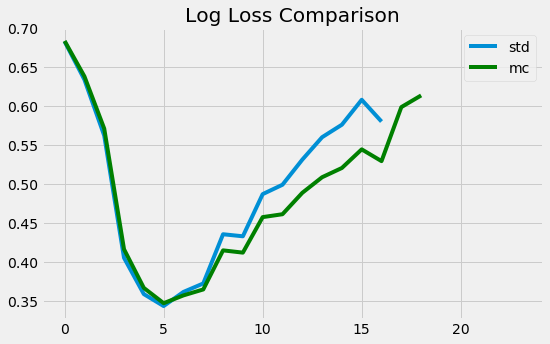

In [12]:
plt.title("Log Loss Comparison")
plt.plot(np.arange(len(modeltest_1.history)), [x[0] for x in modeltest_1.history], label="std")
plt.plot(np.arange(len(modeltest_1.history)), [x[1] for x in modeltest_1.history], "g-", label="mc")
plt.legend(loc='best')

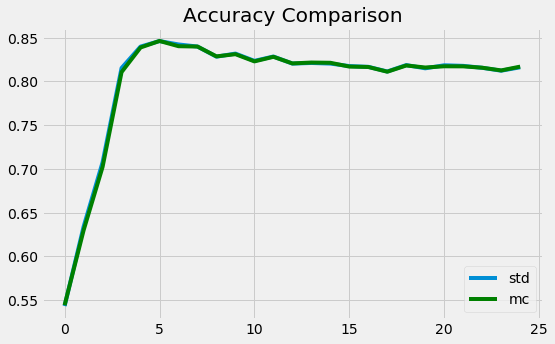

In [13]:
plt.title("Accuracy Comparison")
plt.plot(np.arange(0, len(modeltest_1.history)), [x[2] for x in modeltest_1.history], label="std")
plt.plot(np.arange(0, len(modeltest_1.history)), [x[3] for x in modeltest_1.history], "g-", label="mc")
plt.legend(loc='best')

## Standard LSTM
I choose to keep a very low weight decay because assigning zero seems to cause some problems.

In [14]:
print('Build model...')
model = get_model(edrop=0, rdrop=0, odrop=0, idrop=0, weight_decay=1e-10)

Build model...


In [15]:
modeltest_2 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=1, verbose=0, T=1,
                        loss='binary', batch_size=TEST_BATCH_SIZE)

In [17]:
history_2 = model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=20, callbacks=[modeltest_2])

Epoch 1/20
Standard logloss/acc at epoch 00000: 0.3827/83.02%
MC logloss/acc at epoch 00000: 0.3827/83.02%
12s - loss: 0.4246 - binary_accuracy: 0.8027
Epoch 2/20
Standard logloss/acc at epoch 00001: 0.3808/83.35%
MC logloss/acc at epoch 00001: 0.3808/83.35%
12s - loss: 0.3018 - binary_accuracy: 0.8740
Epoch 3/20
Standard logloss/acc at epoch 00002: 0.3860/83.48%
MC logloss/acc at epoch 00002: 0.3860/83.48%
12s - loss: 0.2066 - binary_accuracy: 0.9210
Epoch 4/20
Standard logloss/acc at epoch 00003: 0.4828/82.37%
MC logloss/acc at epoch 00003: 0.4828/82.37%
12s - loss: 0.1464 - binary_accuracy: 0.9480
Epoch 5/20
Standard logloss/acc at epoch 00004: 0.5670/82.36%
MC logloss/acc at epoch 00004: 0.5670/82.36%
12s - loss: 0.0907 - binary_accuracy: 0.9700
Epoch 6/20
Standard logloss/acc at epoch 00005: 0.6318/82.33%
MC logloss/acc at epoch 00005: 0.6318/82.33%
12s - loss: 0.0523 - binary_accuracy: 0.9840
Epoch 7/20
Standard logloss/acc at epoch 00006: 0.7240/81.83%
MC logloss/acc at epoch 00

In [25]:
best_epoch = np.argmin([x[1] for x in modeltest_2.history]) + 1
print("Best Loss: {:.4f} Acc: {:.2f}% Best Epoch: {}".format(
    modeltest_2.history[best_epoch-1][1], 
    modeltest_2.history[best_epoch-1][3] * 100, 
    best_epoch
))

Best Loss: 0.3808 Acc: 83.35% Best Epoch: 2


## LSTM with Standard Dropout (different mask at differnt time steps)

In [20]:
print('Build model...')
model = get_model(edrop=0.25, rdrop=0, odrop=0.25, idrop=0, weight_decay=1e-4)

Build model...


In [21]:
modeltest_3 = ModelTest(X_test, Yt=Y_test,
                        test_every_X_epochs=1, verbose=0, T=10,
                        loss='binary', batch_size=TEST_BATCH_SIZE)

In [22]:
history_3 =model.fit(
    X_train, Y_train,
    verbose=2,
    shuffle=True,
    # validation_data=[X_test, Y_test],
    batch_size=BATCH_SIZE, epochs=20, callbacks=[modeltest_3])

Epoch 1/20
Standard logloss/acc at epoch 00000: 0.6815/53.98%
MC logloss/acc at epoch 00000: 0.6817/54.06%
20s - loss: 65.0347 - binary_accuracy: 0.5346
Epoch 2/20
Standard logloss/acc at epoch 00001: 0.5196/73.82%
MC logloss/acc at epoch 00001: 0.5141/74.75%
20s - loss: 35.2294 - binary_accuracy: 0.6488
Epoch 3/20
Standard logloss/acc at epoch 00002: 0.3926/83.58%
MC logloss/acc at epoch 00002: 0.4047/83.23%
20s - loss: 18.5366 - binary_accuracy: 0.7966
Epoch 4/20
Standard logloss/acc at epoch 00003: 0.3526/84.39%
MC logloss/acc at epoch 00003: 0.3524/84.30%
20s - loss: 9.5994 - binary_accuracy: 0.8532
Epoch 5/20
Standard logloss/acc at epoch 00004: 0.3762/83.12%
MC logloss/acc at epoch 00004: 0.3717/83.08%
20s - loss: 4.9780 - binary_accuracy: 0.8828
Epoch 6/20
Standard logloss/acc at epoch 00005: 0.3679/83.60%
MC logloss/acc at epoch 00005: 0.3672/83.50%
20s - loss: 2.6770 - binary_accuracy: 0.9053
Epoch 7/20
Standard logloss/acc at epoch 00006: 0.3755/83.64%
MC logloss/acc at epoch

/home/ceshine/miniconda3/envs/ds36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/home/ceshine/miniconda3/envs/ds36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


In [24]:
best_epoch = np.argmin([x[1] for x in modeltest_3.history[:19]]) + 1
print("Best Loss: {:.4f} Acc: {:.2f}% Best Epoch: {}".format(
    modeltest_3.history[best_epoch-1][1], 
    modeltest_3.history[best_epoch-1][3] * 100, 
    best_epoch
))

Best Loss: 0.3524 Acc: 84.30% Best Epoch: 4


## Visualizations

In [40]:
bins = np.arange(-0.1, 0.035, 0.01)

In [53]:
len(history_2.history["binary_accuracy"])

20

(array([-0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04]),
 <a list of 9 Text xticklabel objects>)

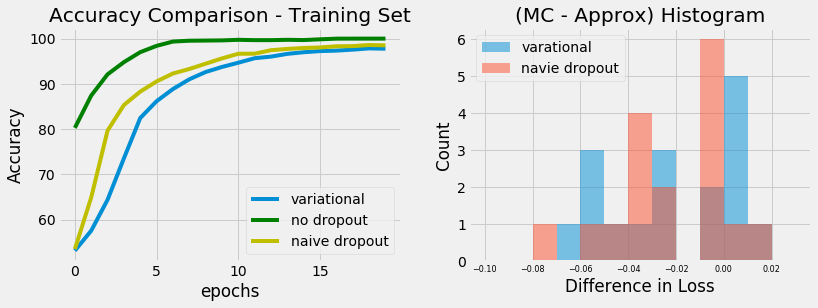

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Accuracy Comparison - Training Set")
plt.plot(np.arange(len(history_2.history["binary_accuracy"])), 
         np.array(history_1.history["binary_accuracy"][:20]) * 100, label="variational")
plt.plot(np.arange(len(history_2.history["binary_accuracy"])), 
         np.array(history_2.history["binary_accuracy"]) * 100, "g-", label="no dropout")
plt.plot(np.arange(len(history_3.history["binary_accuracy"])), 
         np.array(history_3.history["binary_accuracy"]) * 100, "y-", label="naive dropout")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.title("(MC - Approx) Histogram")
plt.hist([x[1] - x[0]  for x in modeltest_1.history[:17]], bins=bins, alpha=0.5, label="varational")
plt.hist([x[1] - x[0]  for x in modeltest_3.history[:17]], bins=bins, alpha=0.5, label="navie dropout")
plt.legend(loc='best')
plt.xlabel("Difference in Loss")
plt.ylabel("Count")
plt.xticks(fontsize=8, rotation=0)

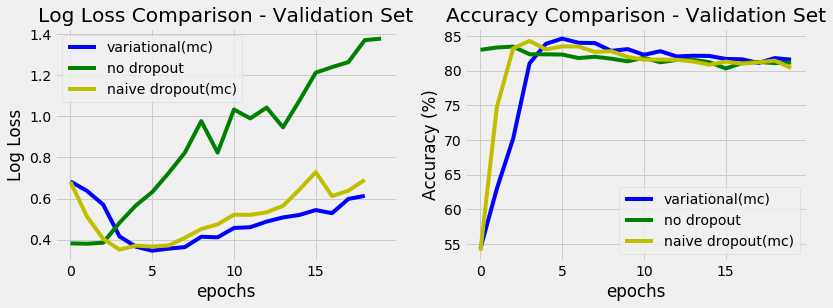

In [60]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Log Loss Comparison - Validation Set")
plt.plot(np.arange(len(modeltest_2.history)), [x[1] for x in modeltest_1.history[:20]], "b-", label="variational(mc)")
plt.plot(np.arange(len(modeltest_2.history)), [x[1] for x in modeltest_2.history], "g-", label="no dropout")
plt.plot(np.arange(len(modeltest_3.history)), [x[1] for x in modeltest_3.history], "y-", label="naive dropout(mc)")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("Log Loss")
plt.subplot(1, 2, 2)
plt.title("Accuracy Comparison - Validation Set")
plt.plot(np.arange(len(modeltest_2.history)), [x[3] * 100 for x in modeltest_1.history[:20]], "b-", label="variational(mc)")
plt.plot(np.arange(len(modeltest_2.history)), [x[3] * 100 for x in modeltest_2.history], "g-", label="no dropout")
plt.plot(np.arange(len(modeltest_3.history)), [x[3] * 100 for x in modeltest_3.history], "y-", label="naive dropout(mc)")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("Accuracy (%)")